# S A Herdev Anish (1RVU23CSE385)

##### Langchain

In [ ]:
pip install langchain langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

os.environ["GROQ_API_KEY"] = "Your_API_KEY"

llm = ChatGroq(model="llama-3.1-8b-instant")

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant"),
    ("human", "{question}")
])

chain = prompt | llm

result = chain.invoke({
    "question": "Write a short thriller story on the lost kid in a place called the upside down, which is a parallel universe with monsters."
})

print(result.content)


**The Lost Child of Hawkins**

In the eerie, dark world of the Upside Down, a sense of dread settled over the small town of Hawkins. It was a place where the skies were always grey, the air was thick with an otherworldly energy, and monsters lurked in every shadow.

Ten-year-old Maxine "Max" Thompson had been exploring the forbidden areas of the Upside Down, her curiosity getting the better of her. She had wandered further than she ever had before, deeper into the heart of the twisted landscape. But now, she was lost.

Max had been walking for what felt like hours, her small feet aching in her worn sneakers. The only sound was the soft crunch of snow beneath her feet, and the faint whisper of... something. She shivered, her heart racing with every step.

As the sun (or what passed for it in the Upside Down) began to set, casting long, ominous shadows across the ground, Max stumbled upon a narrow alleyway. She hesitated, her instincts screaming at her to turn back. But her thirst for ad

##### Kaggle data analysis

In [ ]:
pip install kagglehub[hf-datasets]

In [ ]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "College_Admission.csv"

# Load the latest version
hf_dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.HUGGING_FACE,
  "kundanbedmutha/college-admission-dataset-india",
  file_path,
  # Provide any additional arguments like
  # sql_query, hf_kwargs, or pandas_kwargs. See
  # the documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterhugging_face
)

print("Hugging Face Dataset:", hf_dataset)

/tmp/ipython-input-2356524481.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  hf_dataset = kagglehub.load_dataset(


Using Colab cache for faster access to the 'college-admission-dataset-india' dataset.
Hugging Face Dataset: Dataset({
    features: ['student_id', 'age', 'gender', 'category', 'state', 'preferred_stream', 'entrance_exam', 'entrance_score', 'board_percentage', 'extracurricular_score', 'admission_probability', 'admission_status', 'scholarship_eligibility'],
    num_rows: 25000
})


In [ ]:
import pandas as pd

# Convert HF dataset to pandas DataFrame
df = hf_dataset.to_pandas()

# Basic info
print("Shape:", df.shape)
df.head()


Shape: (25000, 13)


,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes


In [ ]:
# Column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               25000 non-null  float64
 1   age                      25000 non-null  int64  
 2   gender                   25000 non-null  object 
 3   category                 25000 non-null  object 
 4   state                    25000 non-null  object 
 5   preferred_stream         25000 non-null  object 
 6   entrance_exam            25000 non-null  object 
 7   entrance_score           25000 non-null  int64  
 8   board_percentage         25000 non-null  float64
 9   extracurricular_score    25000 non-null  int64  
 10  admission_probability    25000 non-null  float64
 11  admission_status         25000 non-null  object 
 12  scholarship_eligibility  25000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.5+ MB


In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
student_id                 0
age                        0
gender                     0
category                   0
state                      0
preferred_stream           0
entrance_exam              0
entrance_score             0
board_percentage           0
extracurricular_score      0
admission_probability      0
admission_status           0
scholarship_eligibility    0
dtype: int64


In [ ]:
numerical_cols = [
    'age',
    'entrance_score',
    'board_percentage',
    'extracurricular_score',
    'admission_probability'
]

df[numerical_cols].describe()


,age,entrance_score,board_percentage,extracurricular_score,admission_probability
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,18.492440,77.879760,75.028014,4.990920,0.323997
std,1.116205,120.356125,14.438767,3.158942,0.142427
min,17.000000,0.000000,50.440000,0.000000,0.041990
25%,17.000000,0.000000,62.550000,2.000000,0.219000
50%,18.000000,20.000000,75.070000,5.000000,0.319000
75%,19.000000,126.000000,87.640000,8.000000,0.419000
max,20.000000,634.000000,99.530000,10.000000,0.731010


In [ ]:
categorical_cols = [
    'gender',
    'category',
    'state',
    'preferred_stream',
    'entrance_exam',
    'admission_status',
    'scholarship_eligibility'
]

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for gender:
gender
other     8387
male      8364
female    8249
Name: count, dtype: int64

Value counts for category:
category
st         5081
obc        5022
sc         5001
general    4963
ews        4933
Name: count, dtype: int64

Value counts for state:
state
rajasthan            1031
karnataka            1014
gujarat              1008
himachal pradesh      991
assam                 990
punjab                985
chhattisgarh          981
meghalaya             978
uttar pradesh         978
tamil nadu            976
maharashtra           973
nagaland              965
arunachal pradesh     960
telangana             958
mizoram               955
jharkhand             955
odisha                953
bihar                 949
sikkim                948
andhra pradesh        947
tripura               942
manipur               939
madhya pradesh        925
haryana               921
goa                   890
kerala                888
Name: count, dtype: int64

Value counts for pr

In [ ]:
df['admission_status'].value_counts(normalize=True) * 100


,proportion
admission_status,
rejected,67.392
admitted,32.608


In [ ]:
# Addmission vs Gender
pd.crosstab(
    df['gender'],
    df['admission_status'],
    normalize='index'
) * 100


admission_status,admitted,rejected
gender,,
female,32.694872,67.305128
male,32.006217,67.993783
other,33.122690,66.877310


In [ ]:
# Admission vs Category
pd.crosstab(
    df['category'],
    df['admission_status'],
    normalize='index'
) * 100


admission_status,admitted,rejected
category,,
ews,33.002230,66.997770
general,32.399758,67.600242
obc,33.293509,66.706491
sc,31.633673,68.366327
st,32.710096,67.289904


In [ ]:
# Average scores for admitted vs rejected
df.groupby('admission_status')[numerical_cols].mean()

,age,entrance_score,board_percentage,extracurricular_score,admission_probability
admission_status,,,,,
admitted,18.498037,106.922596,79.701349,5.553361,0.386653
rejected,18.489732,63.827220,72.766795,4.718780,0.293681


In [ ]:
# Scholarship eligibility analysis
pd.crosstab(
    df['scholarship_eligibility'],
    df['admission_status'],
    normalize='index'
) * 100


admission_status,admitted,rejected
scholarship_eligibility,,
no,15.531936,84.468064
yes,100.000000,0.000000


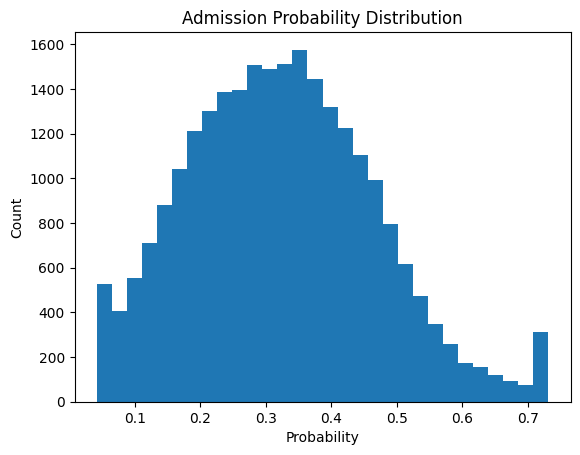

In [ ]:
import matplotlib.pyplot as plt

# Admission probability distribution
plt.hist(df['admission_probability'], bins=30)
plt.title("Admission Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


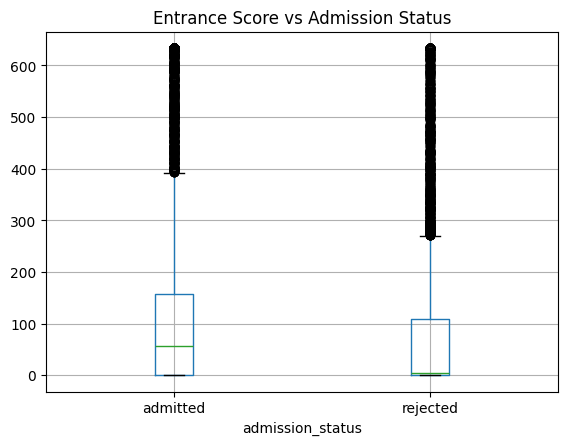

In [ ]:
# Entrance score vs Admission status
df.boxplot(column='entrance_score', by='admission_status')
plt.title("Entrance Score vs Admission Status")
plt.suptitle("")
plt.show()


## Now using Langchain to gain insights from the dataset

In [ ]:
def generate_dataset_summary(df: pd.DataFrame) -> str:
    summary = []

    summary.append(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

    # Numerical columns
    numerical_cols = df.select_dtypes(include='number').columns.tolist()
    summary.append("Numerical column statistics:\n")
    summary.append(df[numerical_cols].describe().to_string())

    # Admission stats
    admission_rate = df['admission_status'].value_counts(normalize=True) * 100
    summary.append("\nAdmission status distribution (%):\n")
    summary.append(admission_rate.to_string())

    # Group insights
    summary.append("\nAverage scores by admission status:\n")
    summary.append(
        df.groupby('admission_status')[[
            'entrance_score',
            'board_percentage',
            'extracurricular_score',
            'admission_probability'
        ]].mean().to_string()
    )

    # Stream-wise probability
    summary.append("\nAverage admission probability by preferred stream:\n")
    summary.append(
        df.groupby('preferred_stream')['admission_probability']
        .mean()
        .sort_values(ascending=False)
        .to_string()
    )

    return "\n\n".join(summary)


In [ ]:
dataset_summary = generate_dataset_summary(df)

print(dataset_summary[:1500])  # preview (LLMs have token limits)

Dataset has 25000 rows and 13 columns.


Numerical column statistics:


         student_id           age  entrance_score  board_percentage  extracurricular_score  admission_probability
count  25000.000000  25000.000000    25000.000000      25000.000000           25000.000000           25000.000000
mean   12500.500000     18.492440       77.879760         75.028014               4.990920               0.323997
std     7212.732314      1.116205      120.356125         14.438767               3.158942               0.142427
min      250.990000     17.000000        0.000000         50.440000               0.000000               0.041990
25%     6250.750000     17.000000        0.000000         62.550000               2.000000               0.219000
50%    12500.500000     18.000000       20.000000         75.070000               5.000000               0.319000
75%    18750.250000     19.000000      126.000000         87.640000               8.000000               0.419000
max    24750.010

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.3
)
prompt = ChatPromptTemplate.from_messages([
    ("system",
     "You are a data analyst. Given dataset statistics, "
     "generate clear insights, trends, and observations. "
     "Use bullet points. Be concise and analytical."),
    ("human",
     "Here is the dataset summary:\n\n{summary}")
])

chain = prompt | llm

response = chain.invoke({
    "summary": dataset_summary
})

print(response.content)


**Dataset Insights and Trends:**

**Demographics and Admission Statistics:**

* The dataset contains 25,000 rows with 13 columns, indicating a comprehensive collection of student data.
* The average age of students is 18.49 years, with a standard deviation of 1.12 years, suggesting a relatively narrow age range.
* The average entrance score is 77.88, with a standard deviation of 120.36, indicating a wide range of scores.
* The average board percentage is 75.03%, with a standard deviation of 14.44%, suggesting a moderate range of scores.
* The average extracurricular score is 4.99, with a standard deviation of 3.16, indicating a moderate range of scores.
* The average admission probability is 0.32, with a standard deviation of 0.14, suggesting a moderate range of probabilities.

**Admission Status Distribution:**

* 67.39% of students are rejected, while 32.61% are admitted, indicating a relatively low admission rate.
* The admission status distribution suggests that the selection proce